In [1]:
# MiniWorld Maze — Evaluation Analysis Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if not os.path.exists(os.path.join(ROOT_DIR, "logs/miniworld/eval")):
    ROOT_DIR = os.getcwd()

EVAL_DIR = os.path.join(ROOT_DIR, "logs/miniworld/eval")
PLOT_DIR = os.path.join(ROOT_DIR, "plots/miniworld")
os.makedirs(PLOT_DIR, exist_ok=True)

print("Current working directory:", os.getcwd())
print("Using root directory:", ROOT_DIR)
print("Loading evaluation data from:", EVAL_DIR)

Current working directory: d:\4th year\fallSem\Topics in CS I\sokoban-assgn\notebooks
Using root directory: d:\4th year\fallSem\Topics in CS I\sokoban-assgn
Loading evaluation data from: d:\4th year\fallSem\Topics in CS I\sokoban-assgn\logs/miniworld/eval


In [7]:
# Load evaluation CSVs (per-episode data)
csv_files = [os.path.join(EVAL_DIR, f) for f in os.listdir(EVAL_DIR) if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError(f"No eval CSVs found in {EVAL_DIR}. Please run eval_maze.py first.")

print(f"✅ Found {len(csv_files)} CSV files:")
for f in csv_files:
    print(" -", os.path.basename(f))

dfs = []
for path in csv_files:
    df = pd.read_csv(path)
    df["filename"] = os.path.basename(path)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print("\n✅ Combined dataset shape:", data.shape)
display(data.head())

✅ Found 4 CSV files:
 - a2c_miniworld_explorer_eval.csv
 - a2c_miniworld_hunter_eval.csv
 - ppo_miniworld_explorer_eval.csv
 - ppo_miniworld_hunter_eval.csv

✅ Combined dataset shape: (40, 8)


,episode,algo,persona,reward,score,steps,mean_reward_per_step,filename
0,1,a2c,explorer,31.312,0,300,0.1044,a2c_miniworld_explorer_eval.csv
1,2,a2c,explorer,36.762,0,300,0.1225,a2c_miniworld_explorer_eval.csv
2,3,a2c,explorer,31.898,0,300,0.1063,a2c_miniworld_explorer_eval.csv
3,4,a2c,explorer,29.208,0,300,0.0974,a2c_miniworld_explorer_eval.csv
4,5,a2c,explorer,26.631,0,300,0.0888,a2c_miniworld_explorer_eval.csv


In [8]:
# Summary statistics (aggregated per persona/algo)

summary = (
    data.groupby(["algo", "persona"])
    .agg(
        mean_reward=("reward", "mean"),
        std_reward=("reward", "std"),
        mean_steps=("steps", "mean"),
        mean_efficiency=("mean_reward_per_step", "mean"),
        success_rate=("score", "mean"),  # success = 1/0
    )
    .reset_index()
)

print("\n📊 Summary Table:")
display(summary)


📊 Summary Table:


,algo,persona,mean_reward,std_reward,mean_steps,mean_efficiency,success_rate
0,a2c,explorer,26.9329,8.182146,300.0,0.08978,0.0
1,a2c,hunter,-3.6369,6.995610,233.7,0.99099,0.0
2,ppo,explorer,14.1200,0.188831,300.0,0.04706,0.0
3,ppo,hunter,-7.3554,4.870480,300.0,-0.02452,0.0


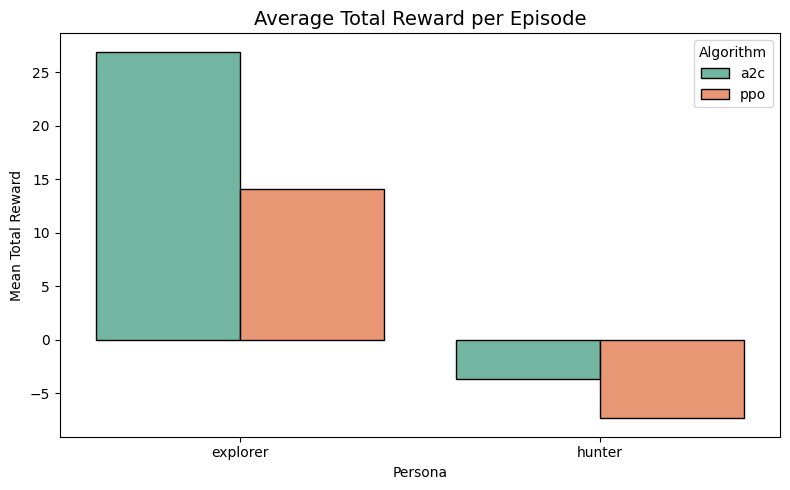

In [9]:
# 1. Mean Total Reward Comparison
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_reward",
    hue="algo",
    edgecolor="black",
    palette="Set2"
)
plt.title("Average Total Reward per Episode", fontsize=14)
plt.ylabel("Mean Total Reward")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "mean_reward_comparison.png"))
plt.show()

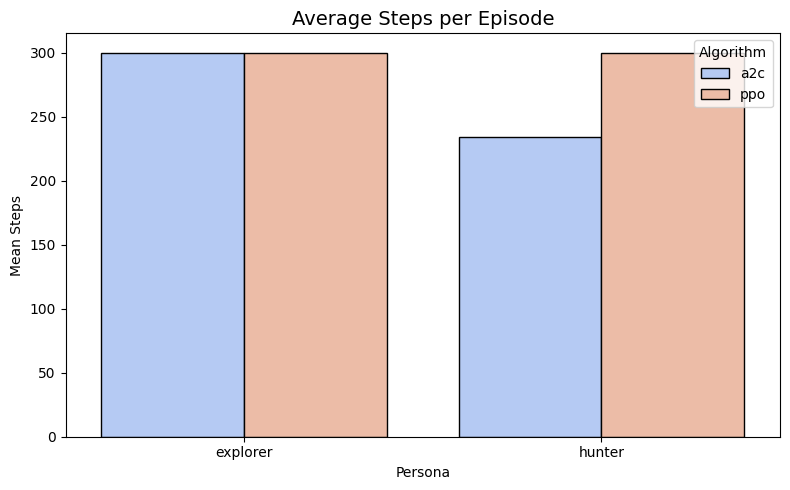

In [11]:
# 2. Steps per Episode Comparison
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_steps",
    hue="algo",
    edgecolor="black",
    palette="coolwarm"
)
plt.title("Average Steps per Episode", fontsize=14)
plt.ylabel("Mean Steps")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "steps_comparison.png"))
plt.show()

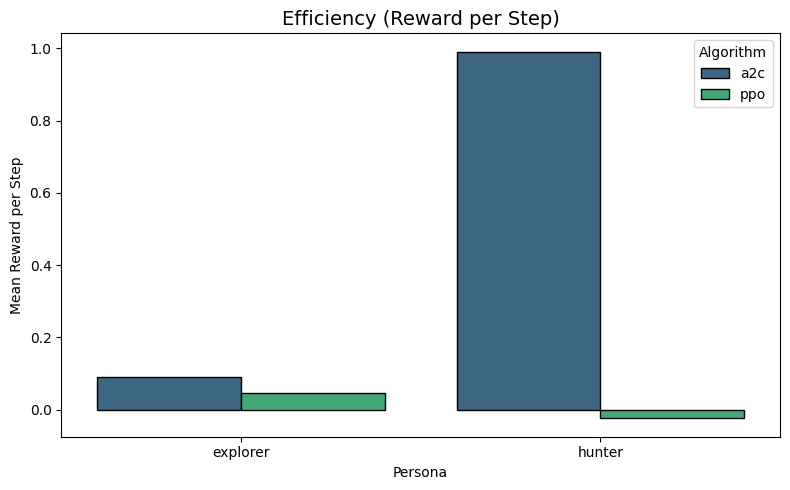

In [13]:
# 3. Efficiency (Reward per Step)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_efficiency",
    hue="algo",
    edgecolor="black",
    palette="viridis"
)
plt.title("Efficiency (Reward per Step)", fontsize=14)
plt.ylabel("Mean Reward per Step")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "efficiency_comparison.png"))
plt.show()

C:\Users\mathu\AppData\Local\Temp\ipykernel_16156\2565275056.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(


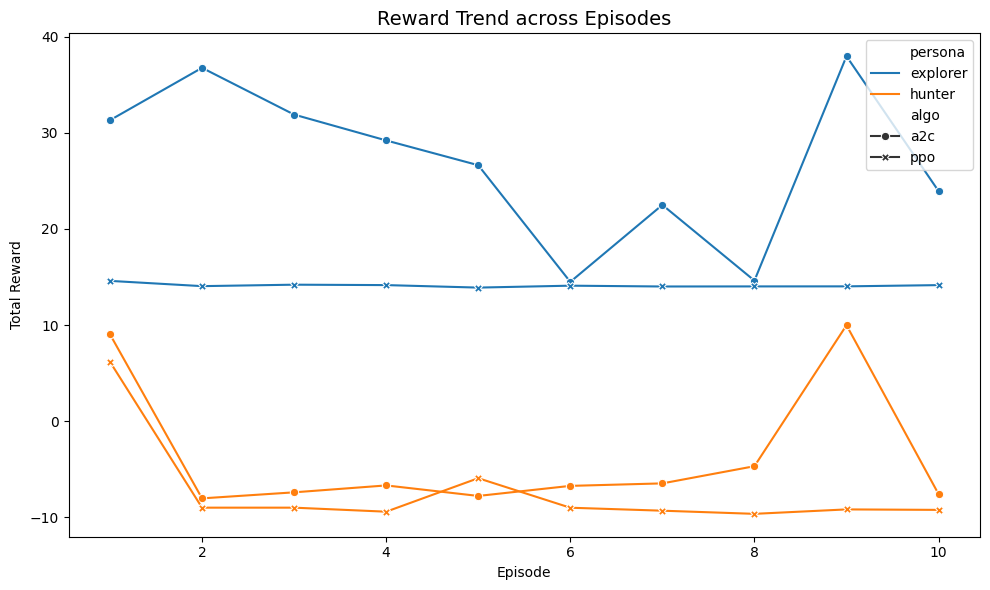

In [14]:
# 4. Reward Trend across Episodes
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data,
    x="episode",
    y="reward",
    hue="persona",
    style="algo",
    markers=True,
    dashes=False,
    estimator="mean",
    ci="sd"
)
plt.title("Reward Trend across Episodes", fontsize=14)
plt.ylabel("Total Reward")
plt.xlabel("Episode")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "reward_trend_per_episode.png"))
plt.show()

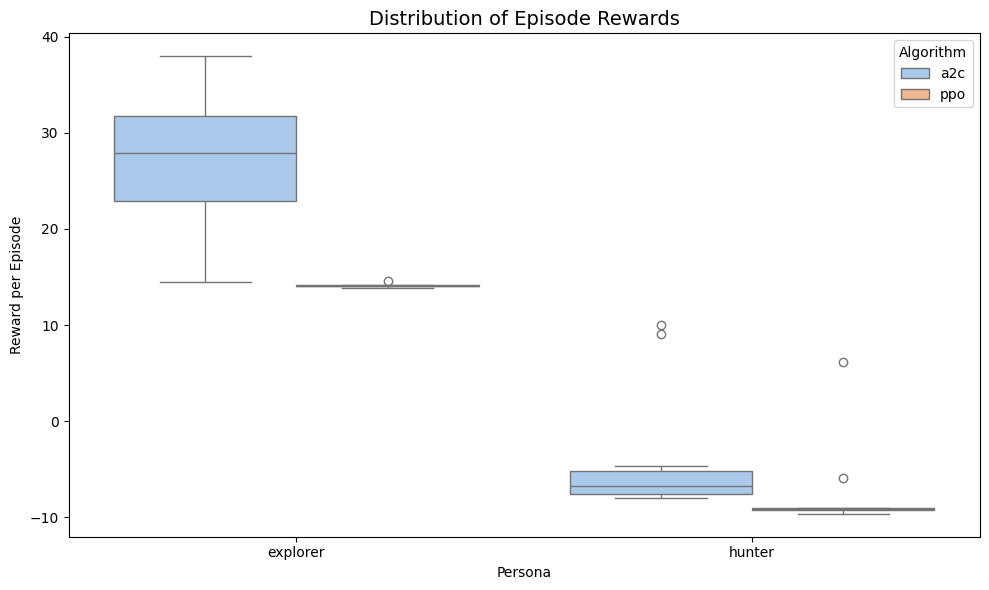

In [ ]:
# 5. Reward Distribution (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data,
    x="persona",
    y="reward",
    hue="algo",
    palette="pastel"
)
plt.title("Distribution of Episode Rewards", fontsize=14)
plt.ylabel("Reward per Episode")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "reward_distribution.png"))
plt.show()


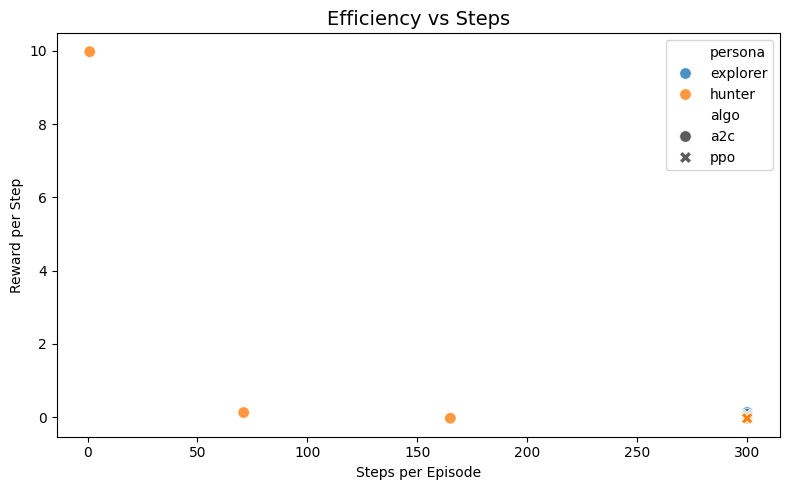

In [16]:
# 7. Efficiency vs Steps (Trade-off)
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x="steps",
    y="mean_reward_per_step",
    hue="persona",
    style="algo",
    s=70,
    alpha=0.8
)
plt.title("Efficiency vs Steps", fontsize=14)
plt.xlabel("Steps per Episode")
plt.ylabel("Reward per Step")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "efficiency_vs_steps.png"))
plt.show()